# Bootleg Macro Testing Ground :dog: :cat: :bird: :eggplant:

## Explore various functionalities here.

### Searching for asset ticker symbols and building watchlists.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
wd = %pwd
import os
fdel = os.path.sep

from MacroBackend import Utilities, PriceImporter, Pull_Data, Charting
import datetime

keys = Utilities.api_keys()
print(keys.keys)
myFredAPI_key = keys.keys['fred']
DataStart = "2021-01-01"
EndDateStr = datetime.date.today().strftime("%Y-%m-%d")


/home/imbobbilly/Documents/Coding/Bootleg_Macro/MacroBackend /home/imbobbilly/Documents/Coding/Bootleg_Macro
Looking for api keys in SystemInfo folder... /home/imbobbilly/Documents/Coding/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
{'fred': 'f632119c4e0599a3229fec5a9ac83b1c', 'bea': '779F26DA-1DB0-4CC2-94DD-2AE3492DA4FC', 'glassnode': '2RpkhVDN1GXAgTNG23u9lhHQCJL', 'quandl': 'ChHHNTWkY4rb3aYoYepw'}


## Pull data series from the Federal Reserve Economic Database (FRED)

In [3]:
btfp_meta, btfp = PriceImporter.PullFredSeries("H41RESPPALDKNWW",myFredAPI_key,start=DataStart,end=EndDateStr,Con2Bil=True)
btfp_d = btfp.resample('D').ffill()
print(btfp_d)
btfp_d

FRED API response:  200
date
2021-01-06      0.000
2021-01-07      0.000
2021-01-08      0.000
2021-01-09      0.000
2021-01-10      0.000
               ...   
2024-05-04    124.117
2024-05-05    124.117
2024-05-06    124.117
2024-05-07    124.117
2024-05-08    112.663
Freq: D, Name: H41RESPPALDKNWW, Length: 1219, dtype: float64


date
2021-01-06      0.000
2021-01-07      0.000
2021-01-08      0.000
2021-01-09      0.000
2021-01-10      0.000
               ...   
2024-05-04    124.117
2024-05-05    124.117
2024-05-06    124.117
2024-05-07    124.117
2024-05-08    112.663
Freq: D, Name: H41RESPPALDKNWW, Length: 1219, dtype: float64

## Get Data from Yahoo Finance via Web scrapers.

### Earnings data, price history and more...

In [11]:
from yahoofinancials import YahooFinancials as yf
import datetime
start_date = "2018-01-01"
end_date = datetime.date.today().strftime("%Y-%m-%d")
ticker = yf("TSLA")
#data = ticker.get_historical_price_data("2000-01-01", end_date, "daily")

#data
data = ticker.get_historical_price_data(start_date, end_date, "daily")
data.keys()
data["TSLA"].keys()
df = pd.DataFrame(data["TSLA"]["prices"]).set_index("formatted_date", drop=True).drop("date", axis=1)

### Explore different matplotliob pre-set chart styles using the pandas shorthand method

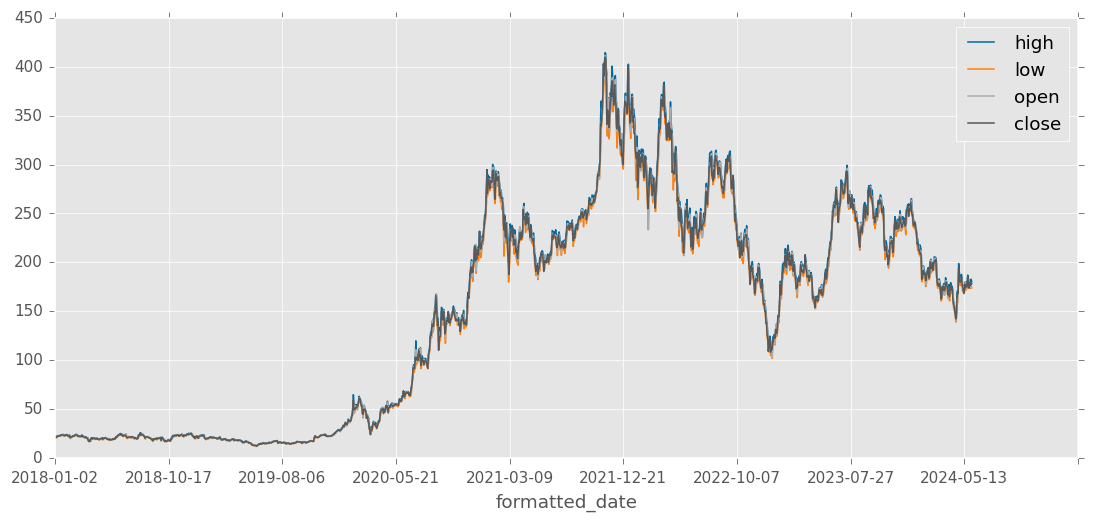

In [15]:
# In [3]: print(plt.style.available)
plt_styles = ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 
 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 
 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 
 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

# Use seaborn style
plt.style.use("tableau-colorblind10")
plt.rcParams["figure.dpi"] = 110
plt.rcParams["figure.figsize"] = (12, 5)

df[df.columns[0:4]].plot()
%matplotlib inline
plt.show()

In [36]:
print("Getting US budget deficit data from FRED.")
def_start_date = "1990-01-01"
deficit_info, deficit = PriceImporter.PullFredSeries("MTSDS133FMS",myFredAPI_key,start=def_start_date,end=EndDateStr,Con2Bil=True)
last_date = deficit.index[-1]  # get the last date which is a month start
last_day_of_month = last_date + pd.offsets.MonthEnd(1)  # get the last day of that month
Findex = pd.date_range(def_start_date,last_day_of_month,freq='D')
Findex

Getting US budget deficit data from FRED.
FRED API response:  200


DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24',
               '2024-04-25', '2024-04-26', '2024-04-27', '2024-04-28',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', length=12539, freq='D')

In [37]:
#Resample to start of each month and forward fill
deficit_d = deficit.resample('M').last()
# Resample to daily frequency
deficit_d = deficit_d.resample('D').ffill()
deficit_d.bfill(inplace=True)
deficit_d
# # Divide each month's data by the number of days in that month
# deficit_d = PriceImporter.ReSampleToRefIndex(deficit_d,Findex,'D') 
# deficit_d = deficit_d.groupby(deficit_d.index.to_period('M')).transform(lambda x: x / len(x))
# deficit_cs = deficit_d.cumsum()
# deficit_df = pd.concat([deficit_d,deficit_cs],axis=1)
# deficit_df.columns = ['Monthly','Cumulative']
# deficit_df

/tmp/ipykernel_176303/1325248132.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  deficit_d = deficit.resample('M').last()


date
1990-01-31      8.282000
1990-02-01      8.282000
1990-02-02      8.282000
1990-02-03      8.282000
1990-02-04      8.282000
                 ...    
2024-04-26   -236.456824
2024-04-27   -236.456824
2024-04-28   -236.456824
2024-04-29   -236.456824
2024-04-30    209.529307
Freq: D, Name: MTSDS133FMS, Length: 12509, dtype: float64

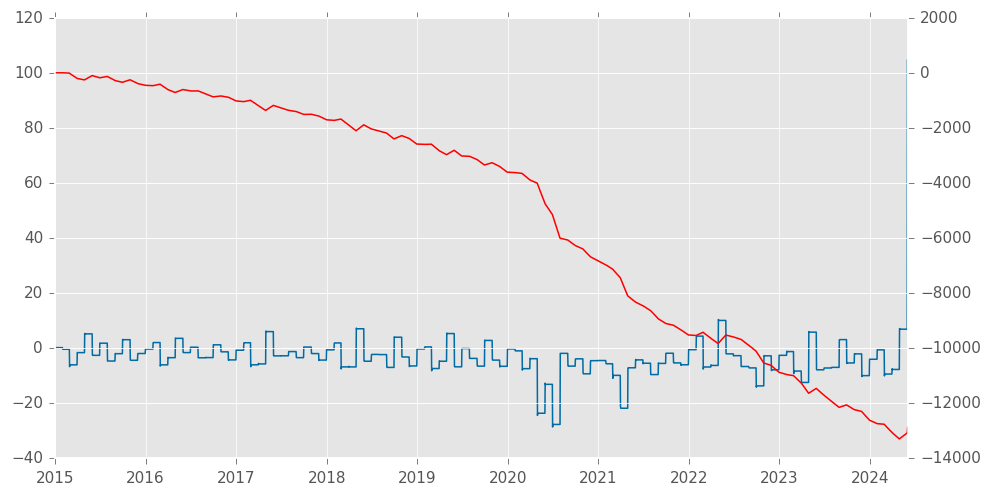

In [34]:
# Use seaborn style
plt.style.use("tableau-colorblind10")
plt.rcParams["figure.dpi"] = 110
plt.rcParams["figure.figsize"] = (10, 5)
%matplotlib inline

plt.plot(deficit_d, label="Monthly deficit daily resample")
ax2 = plt.twinx()
ax2.plot(deficit_cs, label="Cumulative deficit daily resample", color="red")
# #NetLiquidity3 -= deficit_d